![](https://drive.google.com/uc?export=view&id=1-5X9OUkA-C2Ih1gOS9Jd7GmkTWUEpDg1)

# Aprendizaje no supervisado: PCA (Principal Component Analysis)

## Introducción a Data Science
   
<center>
    <img src='images/pca.png'style="width: 600px;">
</center>

**Profesor**: Juan Bekios Calfa

**Carreras**: ICCI, IECI e IenCI

<sub><sup>Basado en el tutorial _In Depth:Principal Component Analysis. _Python Data Science Handbook_. Jake VanderPlas [Link](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html).</sup></sub> 

## Introducción

El Análisis de Componentes Principales (ACP, ó PCA en inglés) es un método rápido y flexible **sin supervisión** para la **reducción de la dimensionalidad de los datos**, que vimos brevemente en el laboratorio pasado utilizando las librerías de _Scikit-Learn_.

## Ejemplo

Observemos el comportamiento de un conjunto de datos bidimesionales de 200 puntos.

In [60]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

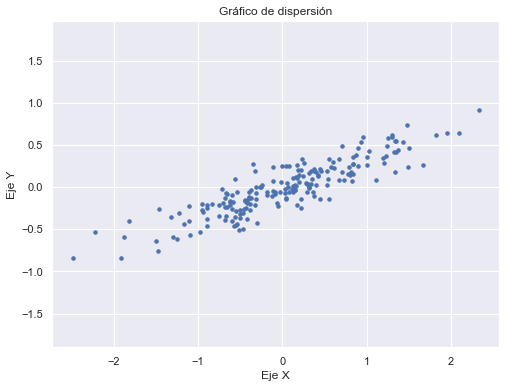

In [61]:
# Configurar uso de sns
sns.set()
# Generar puntos
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
# Graficar puntos
plt.figure(figsize=(8 , 6))
plt.scatter(X[:, 0], X[:, 1], s=12)
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Gráfico de dispersión')
plt.axis('equal')

## Problema

* El gráfico muestra que existe claramente una relación entre el eje X y el eje Y.
* Pero el problema no es predecir los valores de Y con respecto a X.
* Este problema es de **aprendizaje no supervisado**, y que es diferente al de regresión.
* PCA, busca los encontrar las relaciones entre las variables X e Y.
* En el **análisis de componentes principales**, esta relación se cuantifica al encontrar una lista de los ejes principales en los datos y usar esos ejes para describir el conjunto de datos original.

## Implementación en Sklearn

Se puede calcular estos componentes principales de la siguente forma: 

In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

El ajuste aprende algunas cantidades de los datos, lo más importante, es que genera un conjunto de "componentes" y la "varianza explicada":

In [63]:
# Componentes
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [64]:
# Varianza explicada
print(pca.explained_variance_)

[0.7625315 0.0184779]


### Visualización

* Para entender que significan esos números. Visualizaremos cada **componente** como un vector.
  * Cada **componente** representa la dirección del vector.
  * La **varianza explicada** define el largo del vector al cuadrado.

In [66]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0,
                    color='black')
    ax.annotate('', v1, v0, arrowprops=arrowprops)


(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

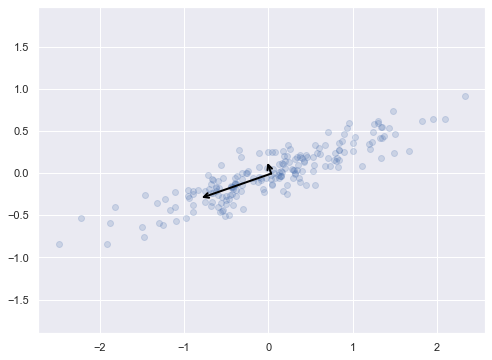

In [71]:
# plot data
plt.figure(figsize=(8 , 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector  * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

### Interpretación

* Estos vectores representan los ejes principales de los datos. y
* Además, la longitud del vector es una indicación de cuán **"importante"** es ese eje para describir la distribución de los datos; más precisamente, es una medida de la varianza de los datos cuando se proyecta en ese eje. 
* La proyección de cada punto de datos sobre los ejes principales son los "componentes principales" de los datos.
* Esta transformación de los datos a componetes principales es una **transformación afín**, lo que básicamente significa que se compone de una **traslación**, **rotación** y **escala** uniforme.

### Interpretación

<center>
    <img src='images/pca-dif-var.png'style="width: 1000px;">
</center>

### Interpretación

<center>
    <img src='images/redundancia01.png'style="width: 1000px;">
</center>

### Interpretación

<center>
    <img src='images/redundancia02.png'style="width: 1000px;">
</center>

## Reducción de dimensión con PCA

El uso de **PCA** para la reducción de dimensionalidad implica poner a cero uno o más de los **componentes principales más pequeños** (poca variabilidad)

Esto genera una proyección de **menor dimensión** de los datos y que conserva la **varianza máxima de los datos**.

Aquí hay un ejemplo del uso de PCA como una transformación de reducción de dimensionalidad:

In [73]:
pca = PCA(n_components= 1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


La transformación de los datos ha reducido el conjunto de datos original de dos dimensiones a solo una.

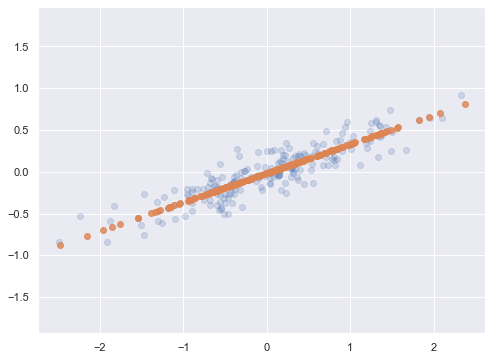

In [74]:
X_new = pca.inverse_transform(X_pca)
plt.figure(figsize=(8 , 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

## PCA para visualización: Escritura de dígitos a mano

La utilidad de la reducción de dimensionalidad puede no ser del todo evidente en solo dos dimensiones, pero se vuelve mucho más clara cuando se observan datos de alta dimensión.

In [76]:
# Cargo la base de datos
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

### Visualizamos los datos originales

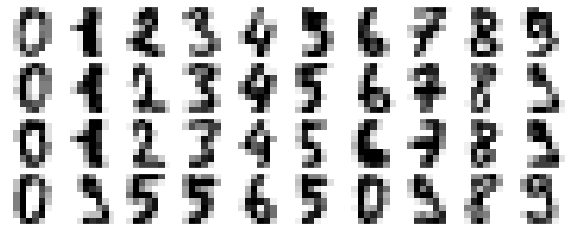

In [77]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

### Aplicamos PCA a las imágenes

In [78]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


De los nuevos puntos proyectados por PCA, solo seleccionamos dos componentes PCA. Y son los que tienen mayor varianza.

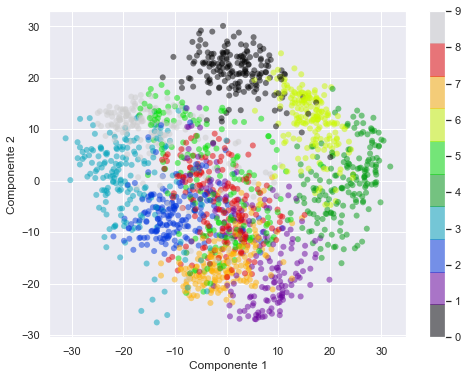

In [79]:
plt.figure(figsize=(8 , 6))
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar()

Recordemos que significan estos componentes: 

* Los datos completos son una nube de puntos de 64 dimensiones
* Éstos puntos son la proyección de cada punto de datos a lo largo de las direcciones con la mayor varianza.
* Se encontró una transformación óptima en un espacio de 64 dimensiones que nos permite ver el diseño de los dígitos en dos dimensiones
* La transformación fue **aprendida sin supervisión**, es decir, sin referencia a las etiquetas.

## ¿Qué significan los componentes?

Podemos ir un poco más allá y empezar a preguntarnos qué significan las dimensiones reducidas. Este significado puede entenderse en términos de combinaciones de vectores básicos. Por ejemplo, cada imagen del conjunto de entrenamiento está definida por una colección de valores de 64 píxeles, que llamaremos vector $x$:

$$
x = [x_1, x_2, x_3 \cdots x_{64}]
$$

Es decir, para construir la imagen, multiplicamos cada elemento del vector por el píxel que describe, y luego sumamos los resultados para construir la imagen:

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$



<center>
    <img src='images/digits-pca-components.png'style="width: 3000px;">
</center>

## Seleccionando el número de componentes

Una parte importante del uso de PCA, en la práctica, es la capacidad de estimar **cuántos componentes se necesitan para describir los datos**. Esto se puede determinar observando la razón de varianza explicada acumulada en función del número de componentes:

Text(0, 0.5, 'Varianza explicada acumulativa')

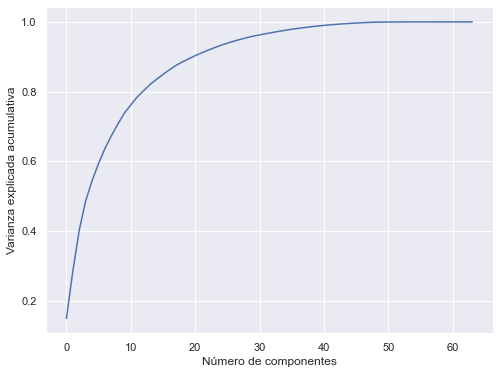

In [84]:
plt.figure(figsize=(8 , 6))
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulativa') 